# MNIST digits data set

In [1]:
from tqdm import tqdm
import numpy as np
from collections import deque
import numpy as np
from tqdm import tqdm
from keras.utils import to_categorical
from keras import models
from keras import layers
from scipy.ndimage.measurements import label

Using TensorFlow backend.


## Loading the MNIST digits data set

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Exploring the format of the MNIST digits data set

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_images)

60000

In [5]:
train_images.ndim

3

In [6]:
train_images.dtype

dtype('uint8')

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
train_labels.shape

(60000,)

In [9]:
len(train_labels)

60000

## Displaying MNIST digits

In [0]:
import matplotlib.pyplot as plt

In [0]:
digit_0 = train_images[0]

In [12]:
digit_0.shape

(28, 28)

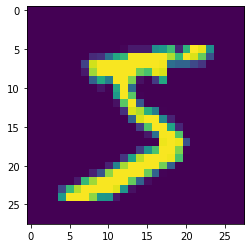

In [13]:
plt.figure(figsize=(4, 4))
plt.imshow(digit_0)
plt.show()

In [14]:
label_0 = train_labels[0]
label_0

5

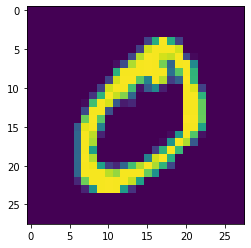

In [15]:
plt.figure(figsize=(4, 4))
digit_1 = train_images[1]
plt.imshow(digit_1)
plt.show()

In [16]:
label_1 = train_labels[1]
label_1

0

# Hand Crafted Features

## Height and Width

In [0]:
def getHeight(img):
  x1=x2=0
  for i in range(len(img)):
    if np.sum(img[i])>0:
      x1=i
      break
  for i in range(len(img)-1,-1,-1):
    if np.sum(img[i])>0:
      x2=i
      break
  return x2-x1
      

In [0]:
def getWidth(img):
  x1 = x2 = 0
  timg = np.transpose(img)
  for i in range(len(timg)):
    if np.sum(timg[i])>0:
      x1=i
      break
  for i in range(len(timg)-1,-1,-1):
    if np.sum(timg[i])>0:
      x2=i
      break
  return x2-x1

In [19]:
train_heights = []
train_widths = []
for i in tqdm(range(len(train_images))):
  train_heights.append(getHeight(train_images[i]))
  train_widths.append(getWidth(train_images[i]))

100%|██████████| 60000/60000 [00:10<00:00, 5538.50it/s]


In [20]:
test_heights = []
test_widths = []
for i in tqdm(range(len(test_images))):
  test_heights.append(getHeight(test_images[i]))
  test_widths.append(getWidth(test_images[i]))

100%|██████████| 10000/10000 [00:01<00:00, 5446.27it/s]


In [0]:
train_h = np.array(train_heights)
train_w = np.array(train_widths)

In [0]:
test_h = np.array(test_heights)
test_w = np.array(test_widths)

In [0]:
train_h = train_h/np.max(train_h)
train_w = train_w/np.max(train_w)

In [0]:
test_h = test_h/np.max(test_h)
test_w = test_w/np.max(test_w)

In [25]:
train_h.shape, train_w.shape

((60000,), (60000,))

In [26]:
test_h.shape, test_w.shape

((10000,), (10000,))

## Number of White Regions

In [27]:
train_components=[]
for i in tqdm(range(len(train_images))):
  s = np.ones((3, 3), dtype=np.int)
  tst = np.where(train_images[i]==0, 1, 0)
  _,n_comp = label(tst, s)
  n_comp = min(n_comp, 5)
  train_components.append(n_comp)

100%|██████████| 60000/60000 [00:04<00:00, 12853.95it/s]


In [28]:
test_components=[]
for i in tqdm(range(len(test_images))):
  s = np.ones((3, 3), dtype=np.int)
  tst = np.where(test_images[i]==0, 1, 0)
  _,n_comp = label(tst, s)
  test_components.append(min(n_comp, 5))

100%|██████████| 10000/10000 [00:00<00:00, 12586.00it/s]


In [0]:
train_comp = np.array(train_components)
test_comp = np.array(test_components)

In [30]:
train_comp.shape, test_comp.shape

((60000,), (10000,))

## Average Intensity

In [0]:
train_intensity = np.mean(train_images, axis=(1,2))

In [0]:
test_intensity = np.mean(test_images, axis=(1,2))

In [33]:
train_intensity.shape, test_intensity.shape

((60000,), (10000,))

In [0]:
train_intensity = train_intensity/np.max(train_intensity)
test_intensity = test_intensity/np.max(test_intensity)

# Linear Regression Model

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
tr_comp = to_categorical(train_comp)
tr_comp.shape

(60000, 6)

In [37]:
te_comp = to_categorical(test_comp)
te_comp.shape

(10000, 6)

In [38]:
train_images = train_images / 255
train_img_flat =  train_images.reshape(train_images.shape[0], -1)
train_img_flat.shape

(60000, 784)

In [39]:
test_images = test_images / 255
test_img_flat = test_images.reshape(test_images.shape[0], -1)
test_img_flat.shape

(10000, 784)

In [0]:
tr_h = train_h[:, np.newaxis]
tr_w = train_w[:, np.newaxis]
tr_intensity = train_intensity[:, np.newaxis]

In [41]:
train_img_flat.shape, tr_h.shape, tr_w.shape, tr_comp.shape, tr_intensity.shape

((60000, 784), (60000, 1), (60000, 1), (60000, 6), (60000, 1))

In [0]:
# stack all the handcrafted variables into np arrays
train_x = np.concatenate((train_img_flat, tr_h, tr_w, tr_comp, tr_intensity), axis=1)

In [43]:
train_x.shape

(60000, 793)

In [0]:
te_h = test_h[:, np.newaxis]
te_w = test_w[:,np.newaxis]
te_intensity = test_intensity[:, np.newaxis]

In [45]:
test_img_flat.shape, te_h.shape, te_w.shape, te_comp.shape, te_intensity.shape

((10000, 784), (10000, 1), (10000, 1), (10000, 6), (10000, 1))

In [0]:
test_x = np.concatenate((test_img_flat, te_h, te_w, te_comp, te_intensity), axis=1)

In [47]:
test_x.shape

(10000, 793)

In [48]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [49]:
network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(train_x.shape[1],)));

In [50]:
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']);

In [51]:
network.fit(train_x, train_labels, epochs=20, batch_size=8);

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





60000/60000 [==============================] - 8s 137us/step - loss: 0.4415 - acc: 0.8916
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2802 - acc: 0.9218
Epoch 3/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2558 - acc: 0.9277
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2438 - acc: 0.9305
Epoch 5/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2356 - acc: 0.9325
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.2298 - acc: 0.9338
Epoch 7/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2255 - acc: 0.9353
Epoch 8/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.2220 - acc: 0.9359
Epoch 9/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2188 - a

In [52]:
test_loss, test_acc = network.evaluate(test_x, test_labels)

10000/10000 [==============================] - 0s 20us/step


In [53]:
test_acc

0.941

In [54]:
test_loss

0.2064282797962427